In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory path to your dataset
dataset_path = r'C:\Users\Ayesha\Desktop\ML_tasks\task4\dataset'

# Create an instance of the ImageDataGenerator with optional data augmentation
datagen = ImageDataGenerator(
    rescale=1./255,         # Rescale pixel values to be in the [0, 1] range
    shear_range=0.2,        # Shear intensity (shear angle in radians)
    zoom_range=0.2,         # Range for random zoom
    horizontal_flip=True    # Randomly flip inputs horizontally
)

# Set the target size based on the input size expected by your model
target_size = (224, 224)

# Create a generator for reading images from the specified directory
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=target_size,
    batch_size=32,          # Adjust batch size based on your needs
    class_mode='categorical'
)


Found 3347 images belonging to 11 classes.


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import MobileNetV2

# Set the target size based on the input size expected by MobileNetV2
target_size = (224, 224)

# Create an instance of the MobileNetV2 model pre-trained on ImageNet
base_model = MobileNetV2(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [3]:
# Create a custom model on top of MobileNetV2
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(11, activation='softmax')  # Assuming 11 food categories
])

# Compile the model
model.compile(optimizer=optimizers.Adam(lr=0.001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

C:\Users\Ayesha\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [5]:
# # Create an instance of the ImageDataGenerator for data augmentation
# datagen = tf.keras.preprocessing.image.ImageDataGenerator(
#     rescale=1./255,
#     shear_range=0.2,
#     zoom_range=0.2,
#     horizontal_flip=True
# )

# # Create a generator for reading images from the specified directory
# train_generator = datagen.flow_from_directory(
#     dataset_path,
#     target_size=target_size,
#     batch_size=32,
#     class_mode='categorical'
# )

Found 3347 images belonging to 11 classes.


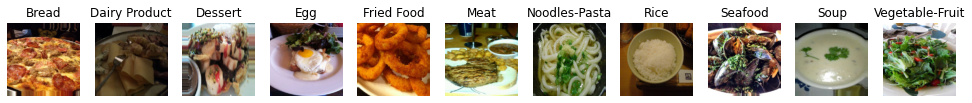

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Get a batch of images from the generator
images, labels = data_generator.next()

# Map class indices to class names
class_names = {0: 'Bread', 1: 'Dairy Product', 2: 'Dessert', 3: 'Egg', 4: 'Fried Food', 5: 'Meat', 6: 'Noodles-Pasta', 7: 'Rice', 8: 'Seafood', 9: 'Soup', 10: 'Vegetable-Fruit'}

# Number of images to display for each class
num_images_per_class = 1

# Set the figure size
plt.figure(figsize=(17, 5))

# Display one image for each class
for class_idx in range(len(class_names)):
    # Find the index of the first image for the current class
    class_index = np.where(labels[:, class_idx] == 1)[0][0]
    
    # Display image for the current class
    plt.subplot(1, len(class_names), class_idx + 1)
    plt.imshow(images[class_index])
    plt.title(f'{class_names[class_idx]}')
    plt.axis('off')

plt.show()

In [34]:
# Train the model
mymodel = model.fit(train_generator, epochs=10)


Epoch 1/10
105/105 [==============================] - 119s 1s/step - loss: 0.3002 - accuracy: 0.8978
Epoch 2/10
105/105 [==============================] - 117s 1s/step - loss: 0.2971 - accuracy: 0.8957
Epoch 3/10
105/105 [==============================] - 120s 1s/step - loss: 0.2833 - accuracy: 0.9008
Epoch 4/10
105/105 [==============================] - 119s 1s/step - loss: 0.2596 - accuracy: 0.9077
Epoch 5/10
105/105 [==============================] - 127s 1s/step - loss: 0.2273 - accuracy: 0.9172
Epoch 6/10
105/105 [==============================] - 123s 1s/step - loss: 0.2263 - accuracy: 0.9187
Epoch 7/10
105/105 [==============================] - 117s 1s/step - loss: 0.2211 - accuracy: 0.9247
Epoch 8/10
105/105 [==============================] - 119s 1s/step - loss: 0.2038 - accuracy: 0.9271
Epoch 9/10
105/105 [==============================] - 125s 1s/step - loss: 0.1931 - accuracy: 0.9367
Epoch 10/10
105/105 [==============================] - 119s 1s/step - loss: 0.2055 - accura

In [39]:
# Save the trained model
model.save(r'C:\Users\Ayesha\Desktop\ML_tasks\task4\mymodel.h5')

In [9]:
# Load the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model(r'C:\Users\Ayesha\Desktop\ML_tasks\task4\mymodel.h5')  

In [44]:
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory path to your validation dataset
validation_dataset_path = r'C:\Users\Ayesha\Desktop\ML_tasks\task4\validation'

# Create an instance of the ImageDataGenerator for preprocessing
validation_datagen = ImageDataGenerator(rescale=1./255)

# Create a generator for reading images from the validation dataset
validation_data_generator = validation_datagen.flow_from_directory(
    validation_dataset_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode=None,  
    shuffle=False      
)

# Make predictions on the validation dataset
validation_predictions = loaded_model.predict(validation_data_generator)

# Get the true labels for the validation dataset
validation_true_labels = validation_data_generator.classes

# Map the predicted class indices to class names
validation_predicted_class_indices = np.argmax(validation_predictions, axis=1)
validation_predicted_class_names = [class_names[idx] for idx in validation_predicted_class_indices]

# Calculate accuracy
validation_accuracy = accuracy_score(validation_true_labels, validation_predicted_class_indices)

print(f'Accuracy on the validation dataset: {validation_accuracy * 100:.2f}%')


Found 1196 images belonging to 11 classes.
Accuracy on the validation dataset: 81.44%


In [15]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the image you want to predict
image_path_to_predict = r'C:\Users\Ayesha\Desktop\ML_tasks\task4\Noodles-test.jpg'

# Load and preprocess the image
img = image.load_img(image_path_to_predict, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Rescale pixel values to be in the [0, 1] range

# Make predictions
predictions_single = loaded_model.predict(img_array)

# Get the predicted class index
predicted_class_index_single = np.argmax(predictions_single)

# Map the predicted class index to the class name
predicted_class_name_single = class_names[predicted_class_index_single]

# Display the image
plt.imshow(img)
plt.title(f'The predicted class for the image is: {predicted_class_name_single}')
plt.show()


The predicted class for the image is: Noodles-Pasta
